# Impact of Education on Singapore's Economy

## Project Overview

The central question this project seeks to address is: "How important is Singapore's education system to its economy?" This analysis aims to understand and quantify the relationships between various educational metrics and the economic performance of Singapore. By examining government spending on education, the output of higher education institutions, and the initial earnings of university graduates, we provide insights into the strategic value of education in Singapore's economic landscape.

## Analysis Flow

The project is structured around several key analyses, each focusing on different aspects of the education-economy nexus:

1. **Government Expenditure on Education vs GDP**: Utilizing linear regression models in Tableau, this analysis explores the correlation between governmental spending on education and GDP, offering a direct look at how public investment in education might influence economic growth.

2. **GDP and Number of Graduates**: Separate analyses for polytechnic and university graduates compare their numbers against GDP, again using linear regression in Tableau to identify trends and impacts. These insights are vital for understanding how the supply of educated individuals affects the broader economy.

3. **Starting Salaries of University Graduates**: This analysis is visualized in Tableau through a bar graph representation that highlights the starting salaries of university graduates by discipline, pointing to the economic value of different fields of study.

4. **Productivity and Educational Output Analysis**: A Random Forest Regression conducted in Jupyter Notebook assesses how total productivity and university graduate numbers contribute to the economy, providing a more nuanced understanding of education's role in economic development.

5. **University-Industry Graduates' Contribution to GDP**: Employing Lasso Regression in Jupyter Notebook, this analysis determines which type of university graduate (by industry) best predicts GDP, offering insights into the specific areas of educational focus that might yield the highest economic benefits.

## Tools and Methods

This project leverages both Tableau and Jupyter Notebook to perform and visualize the analyses:

- **Tableau**: Used for creating interactive visualizations and linear regression models for government expenditure, graduate numbers vs. GDP, and starting salaries. Tableau enables an engaging exploration of the relationships between education metrics and GDP.
- **Jupyter Notebook**: Applied for more complex machine learning models such as Random Forest and Lasso Regression, providing detailed insights and feature importance regarding the impact of educational variables on economic outputs.

## Conclusion

By integrating advanced statistical models with dynamic visualizations, this project elucidates the significant, multifaceted impact of education on Singapore’s economic growth. Our findings not only shed light on current policy effectiveness but also suggest areas for strategic investment in Singapore's education system to foster future economic success.


In [24]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
%pip install xlrd # to read old xls files
sb.set() # set the default Seaborn style for graphics

Note: you may need to restart the kernel to use updated packages.


# Data Preparation for Tableau Visualization

This section details the comprehensive steps undertaken to prepare various datasets for effective analysis in Tableau. Each dataset is loaded, cleaned, transformed, and merged based on the 'Year' column to ensure a unified structure for deeper analysis. Below are the key steps involved:

## Data Loading and Initial Processing
- **GDP Data**: Loaded from `GDP.csv`, unnecessary columns and whitespace are removed, and the 'Year' column is converted to an integer.
- **University Graduates**: Data from `unigrads_sg.csv` is transposed, cleaned, and numeric conversion is applied to the entire dataset.
- **Polytechnic Graduates**: Similar to university data, `polygrad_sg.csv` is processed with transposition and numeric conversion.
- **Job Availability**: Loaded from an Excel file (`sg_jobs.xlsx`), this data is also transposed, cleaned, and prepared for merging.
- **Government Expenditure on Education**: This dataset (`sgedugdp.csv`) undergoes transposition, cleaning, and numeric conversion of year data.

## Merging
- **Inner Join**: All datasets are merged on the 'Year' column using an inner join method. This ensures that only years present in all datasets are included in the final analysis.

## Additional Calculations and Final Cleaning
- **Government Expenditure Calculation**: The 'Government expenditure on education, total (% of GDP)' column is converted to numeric. A new column, 'Government expenditure on education (SGD)', is calculated by multiplying this percentage by the GDP value.
- **Final Cleaning**: The merged dataset is stripped of any trailing whitespace in the column names, missing values in crucial columns are removed, and the dataset is saved to `merge.csv` for use in Tableau.

By following these steps, we ensure the data integrity and usability for creating meaningful visualizations in Tableau.



In [59]:
# This section is meant to combine all the datasets to be used for tableau plotting
fileurl = "datasets/"

# Function to convert 'Year' to integer safely
def convert_year(df):
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Coerce errors turn non-convertible values into NaN
    df['Year'] = df['Year'].dropna().astype(int)  # Drop NaN values and convert to int
    return df

# Read and process the GDP data
gdp = pd.read_csv(fileurl + 'GDP.csv')
gdp.columns = gdp.columns.str.strip()
gdp = gdp.loc[:, ~gdp.columns.str.contains('^Unnamed')]
gdp = convert_year(gdp)

# Process university graduates data
unii = pd.read_csv(fileurl + 'unigrads_sg.csv', header=None)
uni = unii.transpose()
header = uni.iloc[0].str.strip()
uni = uni[1:]
uni.columns = header
uni = uni.apply(pd.to_numeric, errors='coerce')
uni = uni.dropna(axis=1, how='all')
uni = convert_year(uni)

# Process polytechnic graduates data
poly = pd.read_csv(fileurl + 'polygrad_sg.csv', header=None)
poly1 = poly.transpose()
header = poly1.iloc[0].str.strip()
poly1 = poly1[1:]
poly1.columns = header
poly1 = poly1.apply(pd.to_numeric, errors='coerce')
poly1 = poly1.dropna(axis=1, how='all')
poly1 = convert_year(poly1)

# Process job availability data
jobavail = pd.read_excel(fileurl + 'sg_jobs.xlsx', sheet_name='2000 - 2023', header=None)
jobavail = jobavail.transpose()
header = jobavail.iloc[0].str.strip()
jobavail = jobavail[1:]
jobavail.columns = header
jobavail = jobavail.dropna(axis=1, how='all')
jobavail = convert_year(jobavail)

# Process gov education expenditure into data
edu = pd.read_csv(fileurl + 'sgedugdp.csv', header=None)
edu = edu.transpose()
header = edu.iloc[0].str.strip()
edu = edu[1:]
edu.columns = header
edu = edu.dropna(axis=1, how='all')
edu = convert_year(edu)

# Merge the datasets on the 'Year' column using inner join
merged = pd.merge(gdp, uni, on='Year', how='inner')
merged = pd.merge(merged, poly1, on='Year', how='inner')
merged = pd.merge(merged, jobavail, on='Year', how='inner')
merged = pd.merge(merged, edu, on='Year', how='inner')


# Final cleaning and saving
merged.columns = merged.columns.str.strip()
merged = merged.dropna(subset=['GDP', 'Total University Grad'])
merged.to_csv(fileurl + 'merge.csv', index=False)


# First, ensure the 'Government expenditure on education, total (% of GDP)' column is numeric.
merged['Government expenditure on education, total (% of GDP)'] = pd.to_numeric(
    merged['Government expenditure on education, total (% of GDP)'], errors='coerce')

# Then create the 'Government expenditure on education (SGD)' column by performing the calculation.
merged['Government expenditure on education (SGD)'] = (
    merged['GDP'] * (merged['Government expenditure on education, total (% of GDP)'] / 100)
)

# Continue with final cleaning and saving as before
merged.columns = merged.columns.str.strip()
merged = merged.dropna(subset=['GDP', 'Total University Grad'])
merged.to_csv(fileurl + 'merge.csv', index=False)

      Year           GDP  Males University Grad  \
0   2000.0  9.607652e+10                   4536   
1   2001.0  8.979382e+10                   4735   
2   2002.0  9.253836e+10                   4858   
3   2003.0  9.764638e+10                   5197   
4   2004.0  1.150340e+11                   5246   
5   2005.0  1.278080e+11                   4949   
6   2006.0  1.486270e+11                   5207   
7   2007.0  1.809420e+11                   5823   
8   2008.0  1.936170e+11                   5736   
9   2009.0  1.941500e+11                   6004   
10  2010.0  2.398080e+11                   6496   
11  2011.0  2.793570e+11                   6428   
12  2012.0  2.950930e+11                   6778   
13  2013.0  3.075760e+11                   7724   
14  2014.0  3.148640e+11                   7756   
15  2015.0  3.079990e+11                   7872   
16  2016.0  3.190300e+11                   7703   
17  2017.0  3.432730e+11                   8963   
18  2018.0  3.768700e+11       

# Preparation of University Grad Starting Salary Data for Tableau Visualization

This section describes the processes involved in preparing the university graduate starting salary data for subsequent analysis in Tableau. Our main goal here is to ensure that the data is clean, well-formatted, and optimized for accurate and insightful visualizations. Below are the specific steps taken:

## Data Loading
- **Starting Salary Data**: The dataset is loaded from `university_grad_sal.xlsx`. Initial steps include stripping header rows for clarity and setting appropriate column names.

## Data Cleaning and Transformation
- **Qualification Cleaning**: The qualification data often includes verbose and complex titles. A dedicated function, `clean_qualification_final`, is implemented to streamline the qualification names by removing common prefixes and handling variations (e.g., inclusion of 'Honours'). This function:
  - Identifies and removes a range of specific prefixes related to academic degrees to standardize and simplify the qualification names.
  - Handles special cases where 'Honours' is mentioned explicitly or abbreviated as '(Hons)'.
  - Strips any unnecessary parentheses and corrects the text formatting.
  
  These modifications are crucial for reducing variability in the dataset, which helps in grouping and comparing data effectively in Tableau.

## Final Adjustments and Saving
- **Apply Cleaning**: The cleaning function is applied to the 'Qualification' column to generate a new 'modified_qual' column, which holds the cleaned and standardized qualification names.
- **Exporting**: The cleaned and processed dataset is then saved to `unisalmod.csv`, ensuring that it is ready for import into Tableau for further analysis.

By ensuring the clarity and uniformity of the qualification names, we enhance the reliability of our analysis and enable more effective data visualization in Tableau.


In [ ]:
# Top 10 University Grad Starting Salary Data Set to be used in Tableau

# Process job availability data
unisal = pd.read_excel(fileurl + 'university_grad_sal.xlsx', sheet_name='Sheet1', header=None)
header = unisal.iloc[0].str.strip()
unisal = unisal[1:]
unisal.columns = header

def clean_qualification_final(qualifications):
    # Define complex and simpler prefixes
    prefixes = [
        "Double Degree in Bachelor of", 
        "Bachelor of Engineering with Honours in", 
        "Bachelor of Science with Honours in", 
        "Bachelor in Science in", 
        "Bachelor of Science in", 
        "Bachelor of Engineering in", 
        "Bachelor of Business Administration in", 
        "Bachelor of Computing in", 
        "Bachelor of Arts with Honours in", 
        "Bachelor of Arts in", 
        "Bachelor of Engineering", 
        "Bachelor of Science", 
        "Bachelor of Business", 
        "Bachelor of Computing", 
        "Bachelor of Arts", 
        "Bachelor of"  # Generic catch-all
    ]

    # Function to clean the qualification text and handle "Honours"
    def clean_and_handle_honours(qualification):
        # Check for 'Honours' in the original text and remove it for initial cleaning
        honours_suffix = ""
        if "with Honours" in qualification:
            honours_suffix = "with Honours"
            qualification = qualification.replace("with Honours", "").strip()
        elif "(Hons)" in qualification:
            honours_suffix = "(Hons)"
            qualification = qualification.replace("(Hons)", "").strip()

        # Remove any surrounding parentheses
        qualification = remove_parentheses(qualification)

        # Remove known prefixes
        for prefix in sorted(prefixes, key=len, reverse=True):
            if qualification.startswith(prefix):
                # Remove the prefix and extract the base qualification
                qualification = qualification[len(prefix):].strip()
                break  # Stop after the first match
        
        # Final clean-up and append 'Honours' if it was in the original
        qualification = remove_parentheses(qualification)
        if honours_suffix and qualification:  # Only append if there's a qualification
            qualification = f"{qualification} {honours_suffix}".strip()
        elif not qualification:  # If nothing remains, use the last significant word from the prefix
            qualification = prefix.split()[-1]

        return qualification

    # Remove parentheses surrounding the entire string
    def remove_parentheses(text):
        text = text.strip()
        if text.startswith("(") and text.endswith(")"):
            return text[1:-1].strip()
        return text

    # Apply cleaning to each qualification in the list
    cleaned_qualifications = [clean_and_handle_honours(qual) for qual in qualifications]
    return cleaned_qualifications


# Apply the updated cleaning function
unisal['modified_qual'] = clean_qualification_final(unisal['Qualification'])


unisal.to_csv(fileurl + 'unisalmod.csv', index=False)


# Analyzing University Graduate Influence on GDP with Lasso Regression

In this analysis, we use Lasso regression to explore how effectively the number of graduates from various disciplines can predict GDP. Lasso regression is particularly suited for this study due to its ability to perform feature selection, which is vital given the potentially small size of our dataset and the multicollinearity among features.

## Process Overview

1. **Data Merging**: We begin by merging GDP data with university graduate data based on the 'Year' column using an inner join. This ensures that only years with data available for all fields are included in our analysis.

2. **Data Preparation**:
   - **Feature Selection**: We focus on graduates from key disciplines that directly contribute to the  such as Accountancy, Business & Administration, Information Technology, and Engineering Sciences.
   - **Handling Missing Values**: Any records with missing data are removed to maintain the integrity of our regression analysis.
   - **Feature Scaling**: We standardize the features to ensure that the Lasso model treats all variables equally, which is crucial when comparing their influence on GDP.

3. **Model Building**:
   - **Training and Testing Sets**: The dataset is split into training and testing sets to validate the model's performance.
   - **Lasso Regression**: We apply Lasso regression with an alpha value of 0.1. The choice of Lasso over other linear models is due to its effectiveness in reducing the impact of less important features through regularization, which is especially beneficial in datasets with smaller sizes and higher dimensionality.

4. **Interpretation**:
   - **Coefficients**: The model coefficients provide insights into the relative importance of each field of study in predicting GDP.
   - **Visualization**: We plot these coefficients along with their values in a bar chart, enhancing the interpretability of our model’s output.

## Conclusion
This approach allows us to identify which university disciplines have the most significant predictive power concerning GDP, highlighting the economic impact of higher education sectors. By using Lasso regression, we not only predict GDP but also understand the relative importance of each discipline, guiding educational policy and investment decisions.


                                     Feature   Coefficient
0                Accountancy University Grad  4.864018e+10
1  Business & Administration University Grad  4.748169e+09
2     Information Technology University Grad  1.897324e+10
3       Engineering Sciences University Grad  4.200477e+10


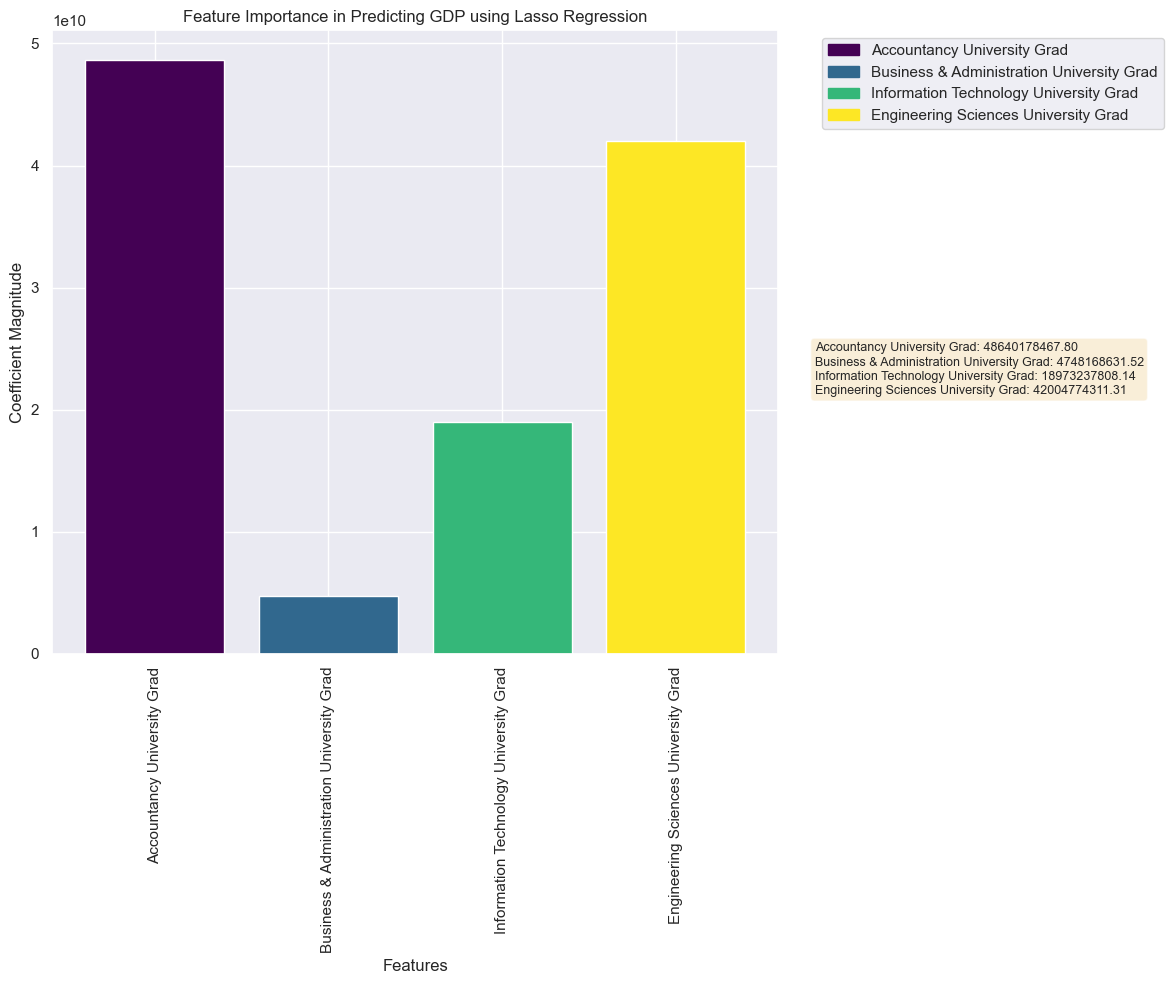

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Merge the datasets on the 'Year' column using inner join
mergedf1 = pd.merge(gdp, uni, on='Year', how='inner')

# Load and prepare data
col = ["GDP",
       "Accountancy University Grad",
       "Business & Administration University Grad",
       "Information Technology University Grad",
       "Engineering Sciences University Grad"]

# Select columns
columns = col  
mergedf1 = mergedf1[columns]

# Drop missing values
mergedf1.dropna(inplace=True)

# Scale features
scaler = StandardScaler()
features = ["Accountancy University Grad",
            "Business & Administration University Grad",
            "Information Technology University Grad",
            "Engineering Sciences University Grad"]
mergedf1[features] = scaler.fit_transform(mergedf1[features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mergedf1[features], mergedf1['GDP'], test_size=0.2, random_state=41)

# Create and fit Lasso model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lasso.coef_})
print(coefficients)

# Plot feature importance with styles
plt.figure(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(coefficients['Feature'])))
bars = plt.bar(coefficients['Feature'], coefficients['Coefficient'], color=colors)
plt.title('Feature Importance in Predicting GDP using Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation='vertical')  # Rotate feature names to vertical

# Adding an inset text box with coefficients
textstr = '\n'.join([f"{row['Feature']}: {row['Coefficient']:.2f}" for index, row in coefficients.iterrows()])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(1.05, 0.5, textstr, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=props)

# Create a legend
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[i], label=coefficients['Feature'][i]) for i in range(len(colors))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Analyzing GDP Predictability from Productivity and Education Data Using Random Trees Regression

This section outlines the steps taken to prepare and analyze how productivity and university graduate numbers can predict GDP using a Random Forest regression model. This method is chosen for its robustness in handling non-linear relationships and feature interactions.

## Process Overview

1. **Data Loading and Cleaning**:
   - **Productivity Data**: Loaded from `prod_3.csv`, this dataset is transposed for easier manipulation, cleaned to remove any rows with all missing values, and transformed so that the 'Year' column holds integers representing each year.
   - **Government Education Expenditure Data**: Similar preprocessing steps are applied to ensure consistency across all datasets.

2. **Data Merging**:
   - **Inner Join**: The GDP data is merged with both the productivity data and university graduate data on the 'Year' column using an inner join. This ensures that only records with complete data across these dimensions are considered for the analysis.

3. **Feature Selection and Model Preparation**:
   - **Features and Target**: 'Total University Grad' and 'Total Value Added by Workers' are selected as features, with GDP as the target variable.
   - **Data Splitting**: The dataset is split into training and testing sets to facilitate unbiased evaluation of the model.

4. **Random Forest Regression**:
   - **Model Building and Training**: A Random Forest Regressor is trained on the data. This model is particularly well-suited for this analysis due to its ability to handle complex dataset structures and provide feature importance metrics.
   - **Prediction and Evaluation**: The model's performance is assessed using the mean squared error (MSE) of its predictions on the test set.

5. **Feature Importance Analysis**:
   - **Visualization**: Feature importances derived from the model are visualized in a horizontal bar chart, providing insights into which variables most significantly impact GDP.
   - **Textual Representation**: An inset text box lists the importance scores next to the plot for precise numerical reference.

## Conclusion
By merging and modeling these datasets, we gain valuable insights into how different economic and educational factors influence GDP. This analysis not only highlights the critical drivers of economic output but also guides policy-making and strategic planning in education and workforce development.


Mean Squared Error: 5.213570618649707e+20


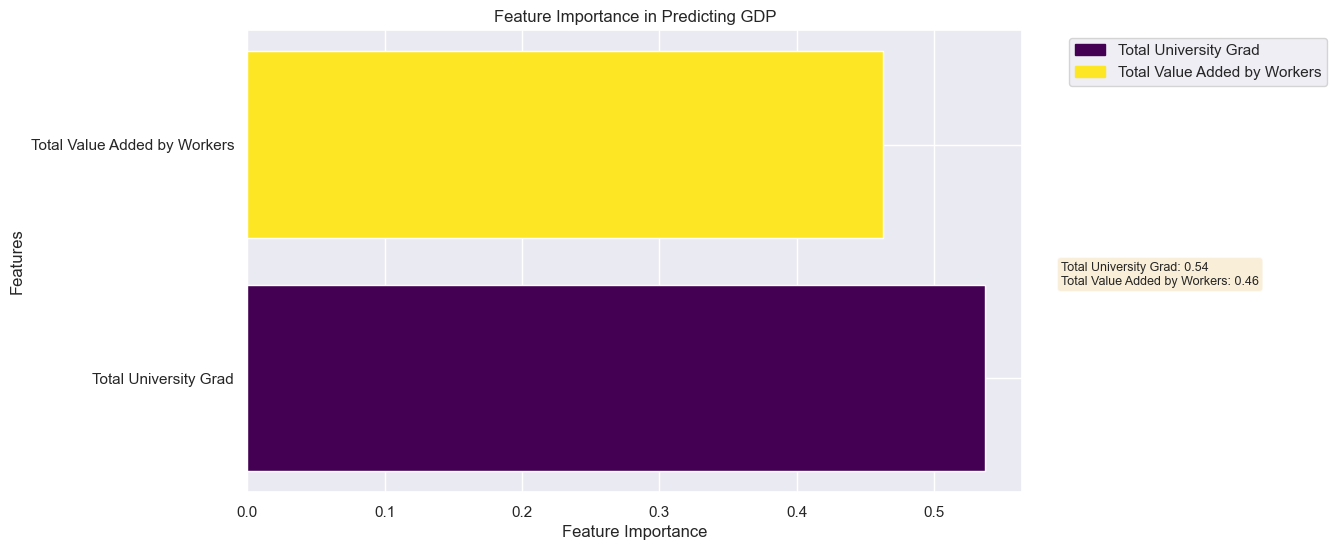

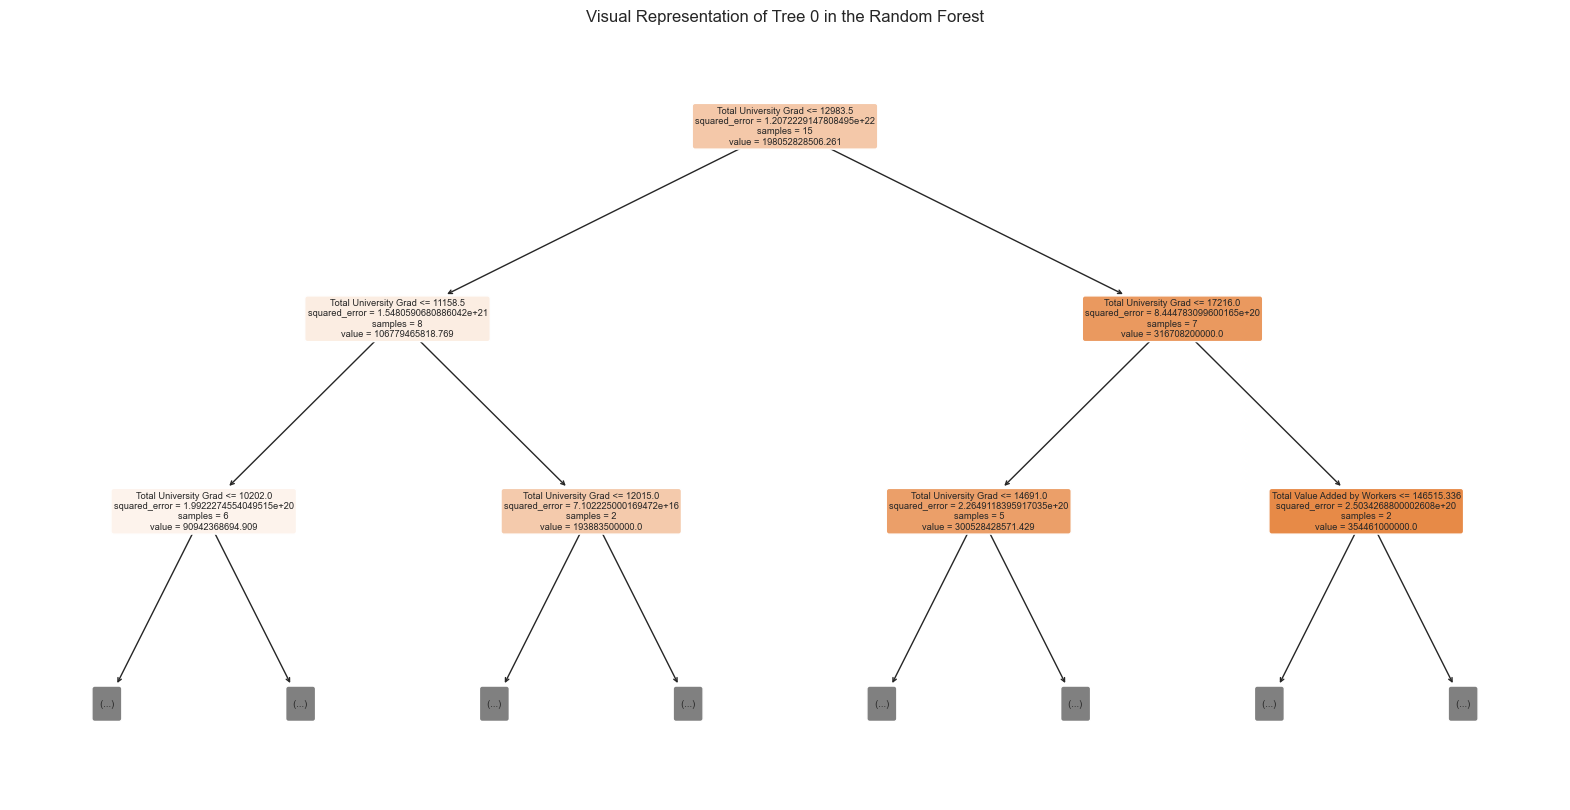

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Combining Productivity , Education

# Process gov education expenditure into data
productivity = pd.read_csv(fileurl + 'prod_3.csv', header=None)
productivity = productivity.transpose()
header = productivity.iloc[0].str.strip()
productivity = productivity[1:]
productivity.columns = header
productivity = productivity.dropna(axis=1, how='all')
productivity = convert_year(productivity)


# Merge the datasets on the 'Year' column using inner join
prodMergeDF1 = pd.merge(gdp, productivity,on='Year', how='inner')
prodMergeDF1 = pd.merge(prodMergeDF1, uni,on='Year', how='inner')

# Prepare the data
X = prodMergeDF1[['Total University Grad', 'Total Value Added by Workers']]
y = prodMergeDF1['GDP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=20)

# Create and fit the model
rf = RandomForestRegressor(n_estimators=100, random_state=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance
feature_importances = rf.feature_importances_
features = X.columns
# Styling the plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
bars = plt.barh(features, feature_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting GDP')

# Adding an inset text box with feature importances
textstr = '\n'.join([f"{feature}: {importance:.2f}" for feature, importance in zip(features, feature_importances)])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(1.05, 0.5, textstr, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=props)

# Create a legend
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[i], label=features[i]) for i in range(len(features))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Visualize one of the decision trees from the forest
tree_index = 0  # Tree index can be changed to see different trees
single_tree = rf.estimators_[tree_index]
plt.figure(figsize=(20, 10))
# Limit the depth of the tree displayed for better readability
plot_tree(single_tree, feature_names=X.columns.tolist(), filled=True, rounded=True, max_depth=2)
plt.title(f'Visual Representation of Tree {tree_index} in the Random Forest')
plt.show()